In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
from mlxtend.evaluate import bias_variance_decomp

In [13]:
# 1. Decision Tree
# Step 1 Data preprocessing
data = pd.read_csv(r"C:\Users\谭兆宏\Desktop\penguins.csv")
data = data.dropna()        # drop data lines which contain 'NaN'
for titles in data:
    value_list = list(data[titles].unique())
    if type(value_list[0]) == str:
        print(titles, value_list)
# Converting str data to int data for analysis
species_label = {'Adelie':0, 'Chinstrap':1, 'Gentoo':2}
island_label = {'Torgersen':0, 'Biscoe':1, 'Dream':2}
sex_label = {'MALE':1, 'FEMALE':0}
data['species'] = data['species'].map(species_label)
data['island'] = data['island'].map(island_label)
data['sex'] = data['sex'].map(sex_label)
x_list, y_list = [], []
for spe in data['species']:
    y_list.append(spe)
island, bill_length_mm,  bill_depth_mm,  flipper_length_mm, body_mass_g, sex = list(data['island']), \
        list(data['bill_length_mm']), list(data['bill_depth_mm']), list(data['flipper_length_mm']), \
        list(data['body_mass_g']), list(data['sex'])
for index in range(len(island)):
    x_list.append([island[index], bill_length_mm[index], bill_depth_mm[index],
                   flipper_length_mm[index], body_mass_g[index], sex[index]])
X_train, X_test, y_train, y_test = train_test_split(x_list, y_list, test_size=0.25)

species ['Adelie', 'Chinstrap', 'Gentoo']
island ['Torgersen', 'Biscoe', 'Dream']
sex ['MALE', 'FEMALE']


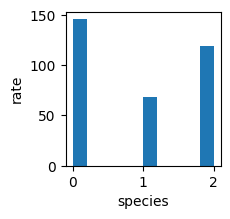

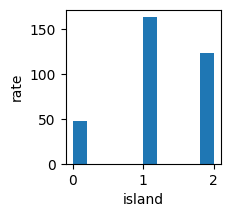

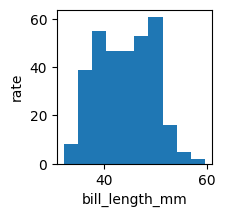

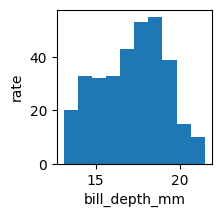

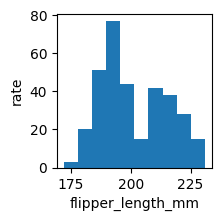

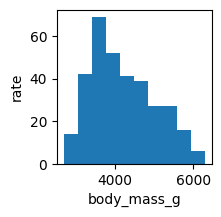

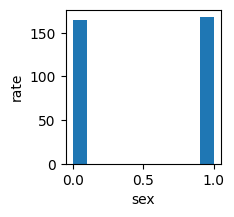

In [14]:
# Step 2 Data statistics
for titles in data:
    plt.figure(figsize=(2,2))
    plt.hist(data[titles], bins=10)
    plt.xlabel(titles)
    plt.ylabel('rate')
    plt.show()

The current max_depth is 2 The current least node size is 3


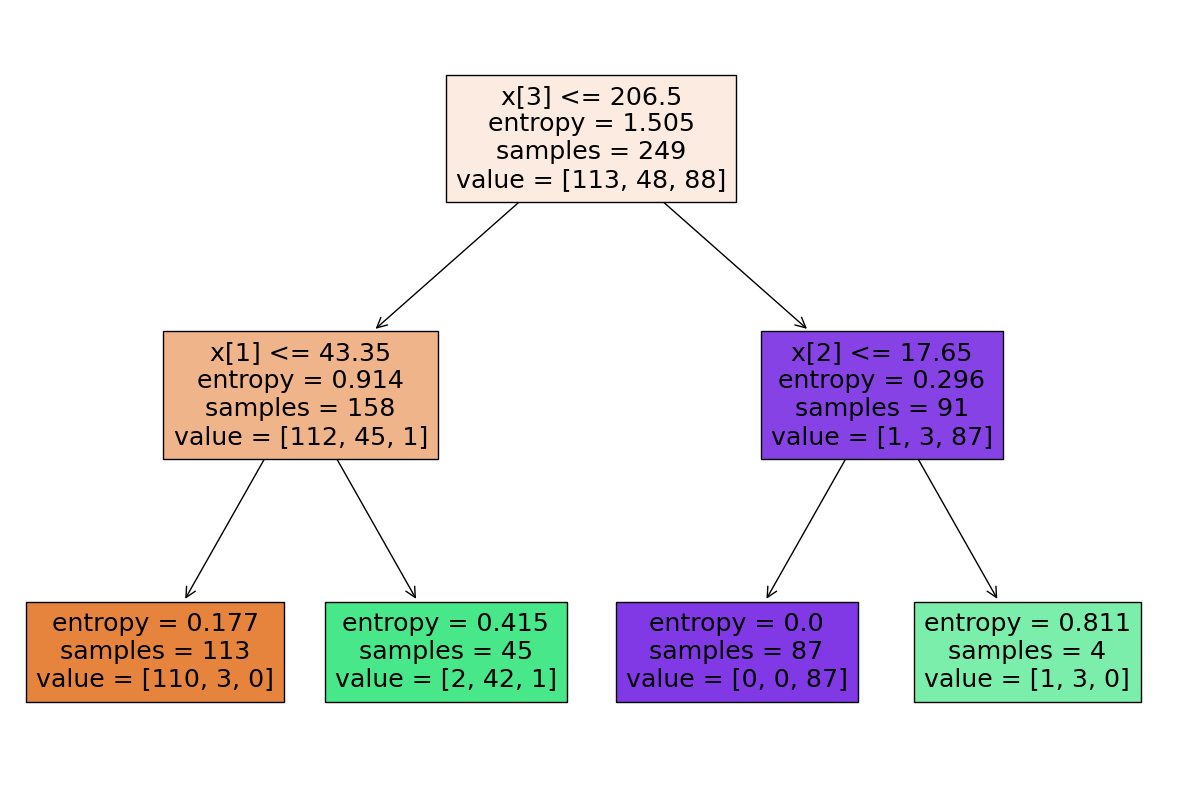

The training accuracy is: 0.9718875502008032
The testing accuracy is: 0.9404761904761905
The current max_depth is 2 The current least node size is 6


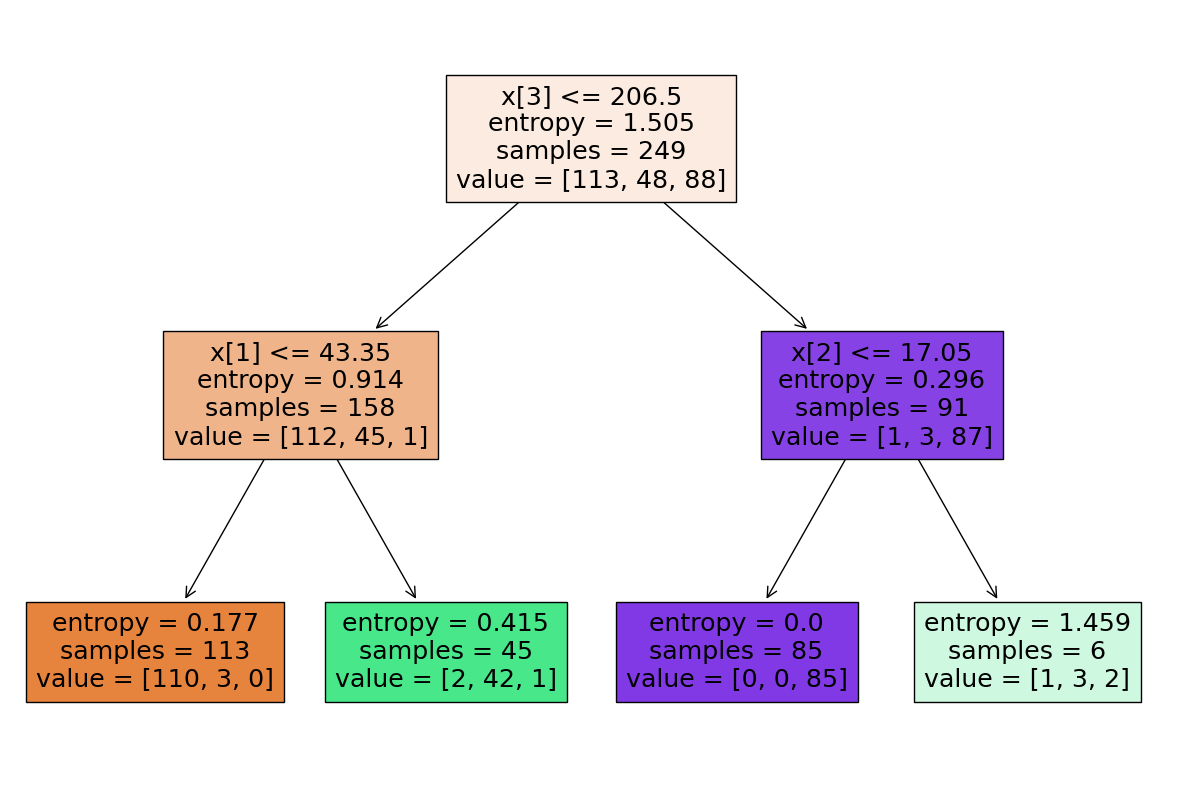

The training accuracy is: 0.963855421686747
The testing accuracy is: 0.9285714285714286
The current max_depth is 2 The current least node size is 9


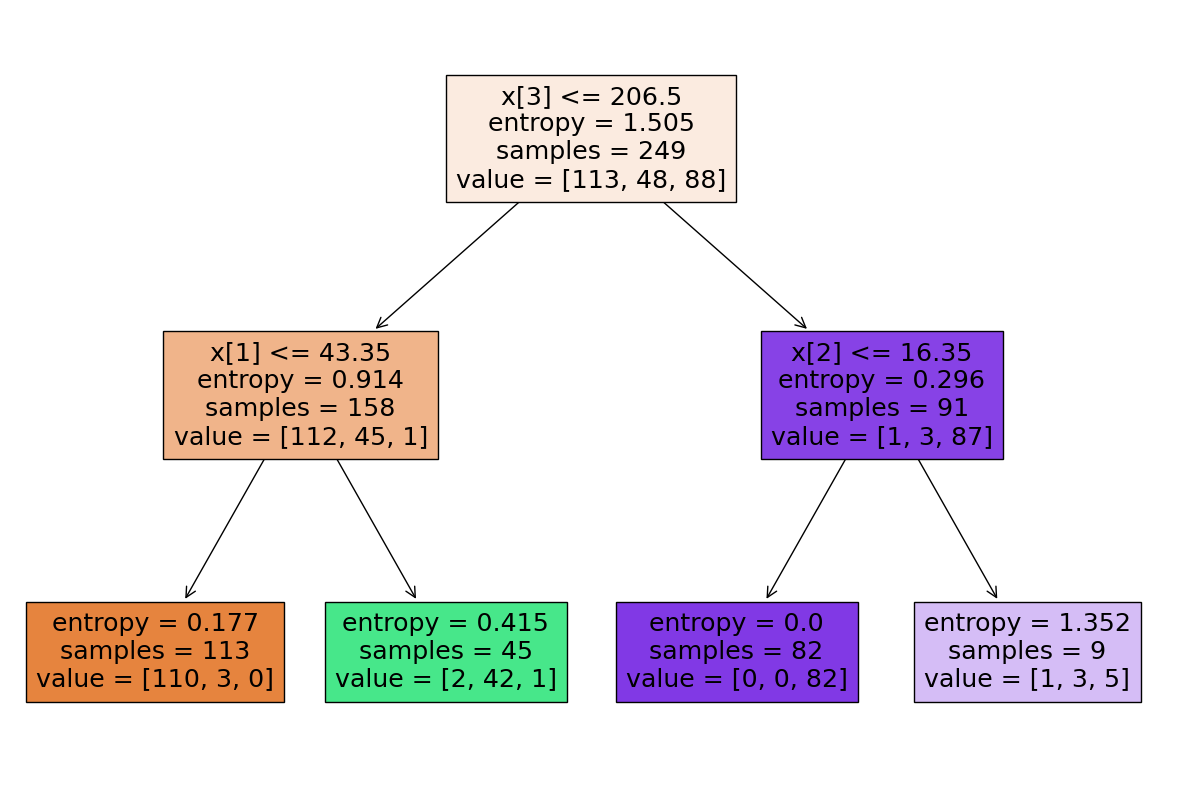

The training accuracy is: 0.9598393574297188
The testing accuracy is: 0.9166666666666666
The current max_depth is 4 The current least node size is 3


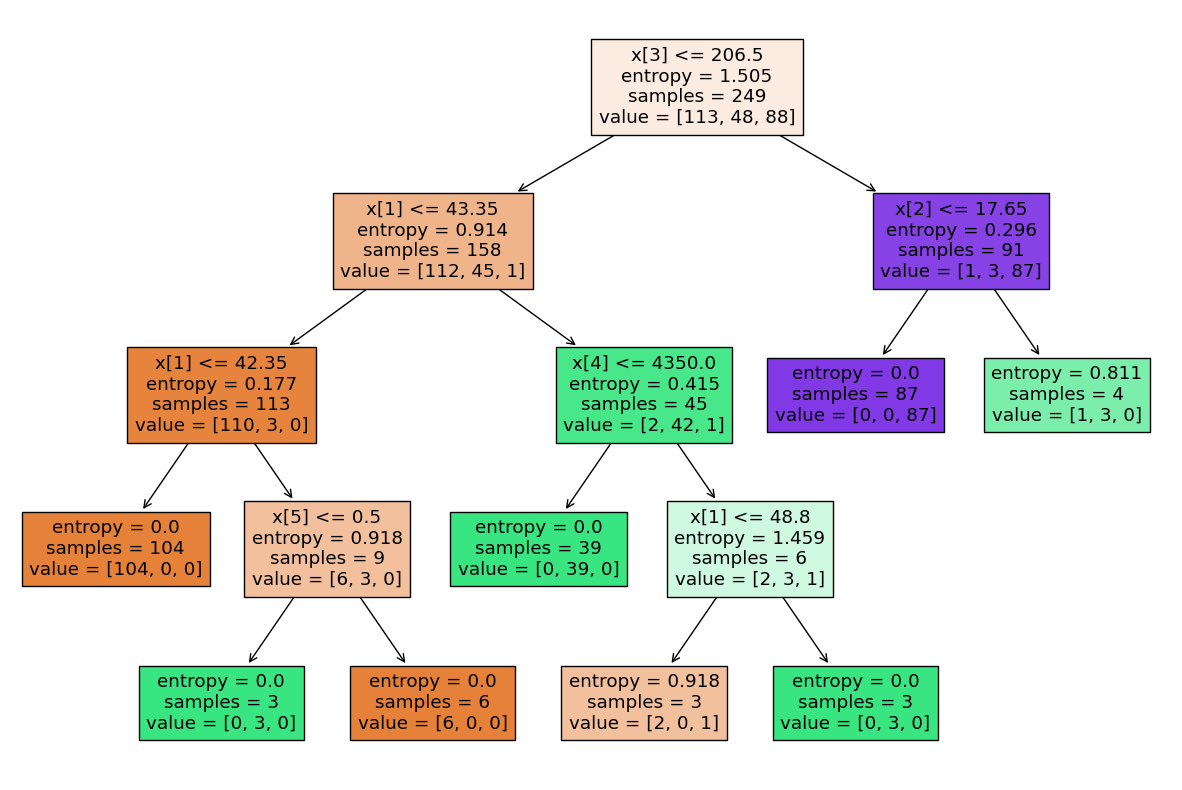

The training accuracy is: 0.9919678714859438
The testing accuracy is: 0.9523809523809523
The current max_depth is 4 The current least node size is 6


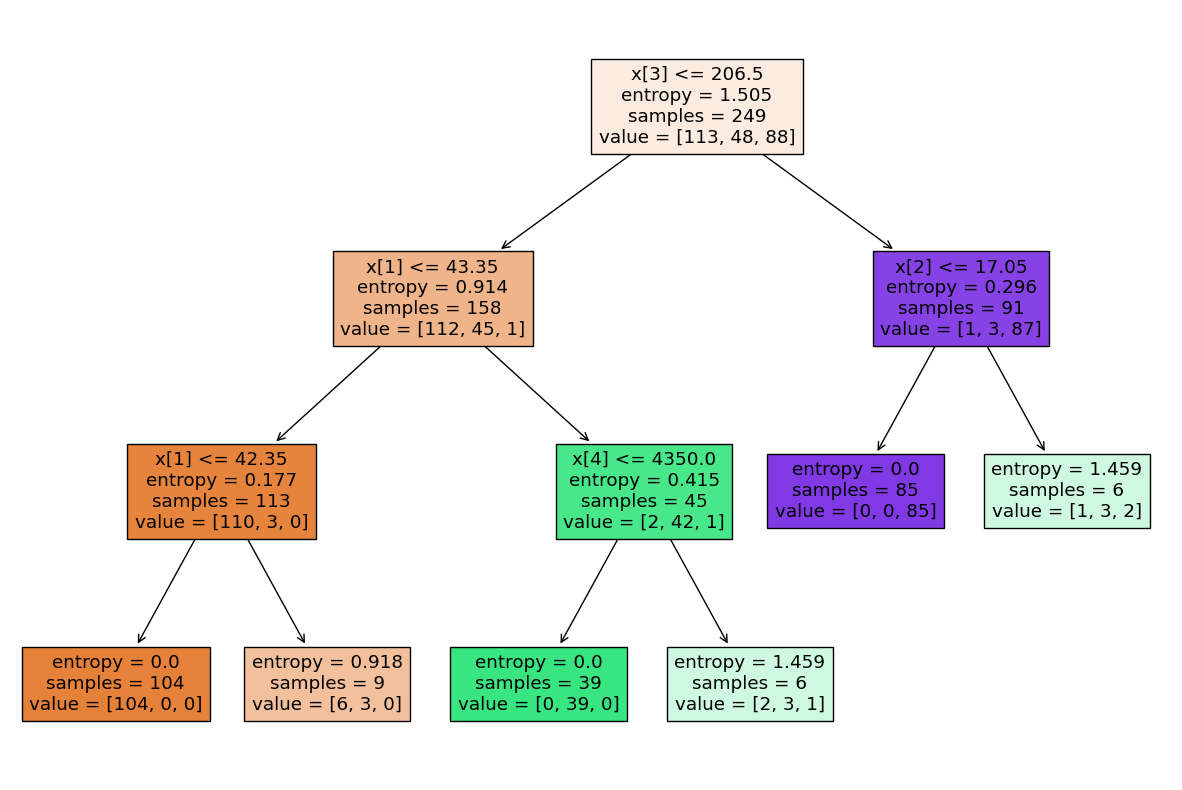

The training accuracy is: 0.963855421686747
The testing accuracy is: 0.9285714285714286
The current max_depth is 4 The current least node size is 9


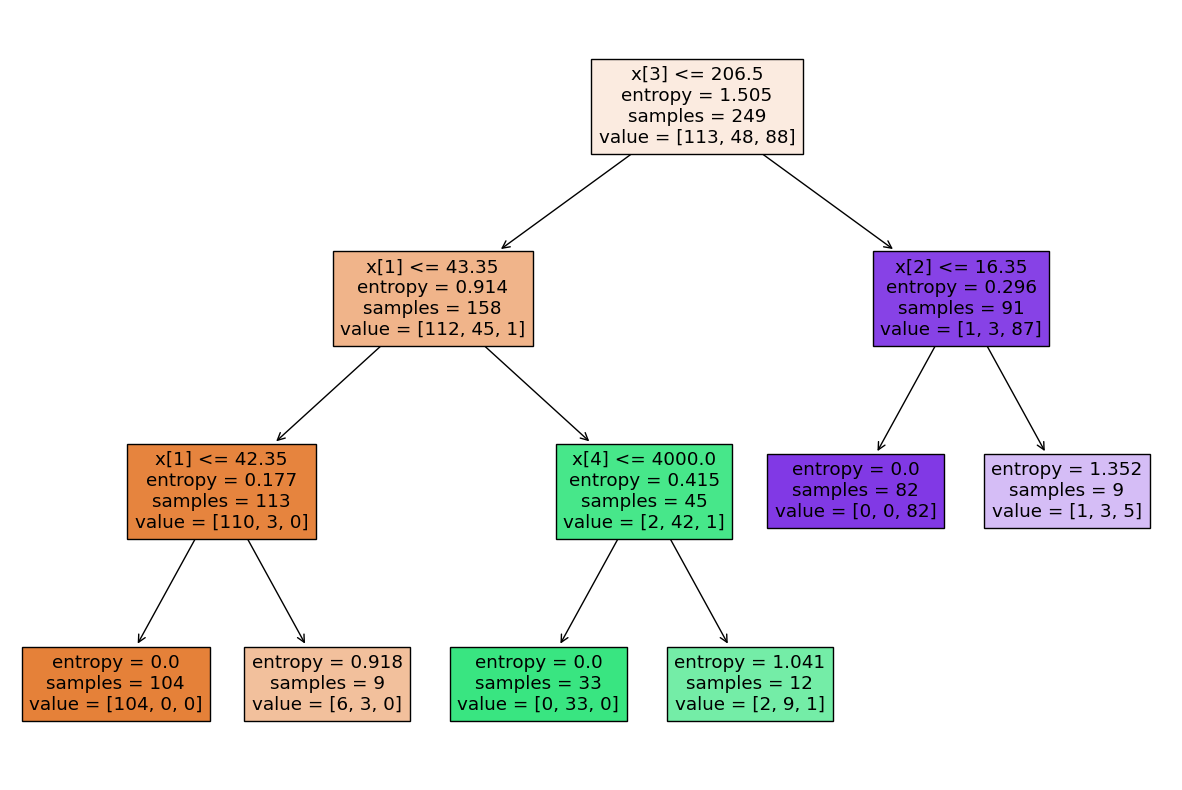

The training accuracy is: 0.9598393574297188
The testing accuracy is: 0.9166666666666666
The current max_depth is 6 The current least node size is 3


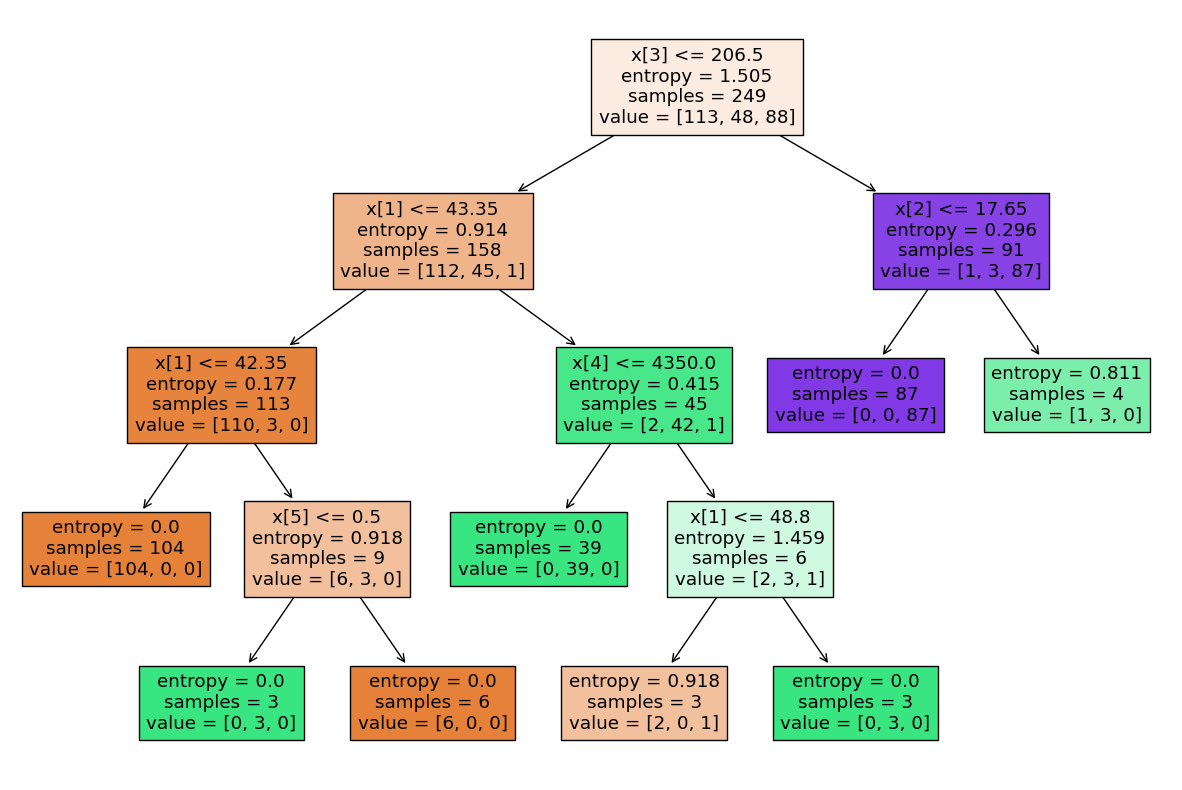

The training accuracy is: 0.9919678714859438
The testing accuracy is: 0.9523809523809523
The current max_depth is 6 The current least node size is 6


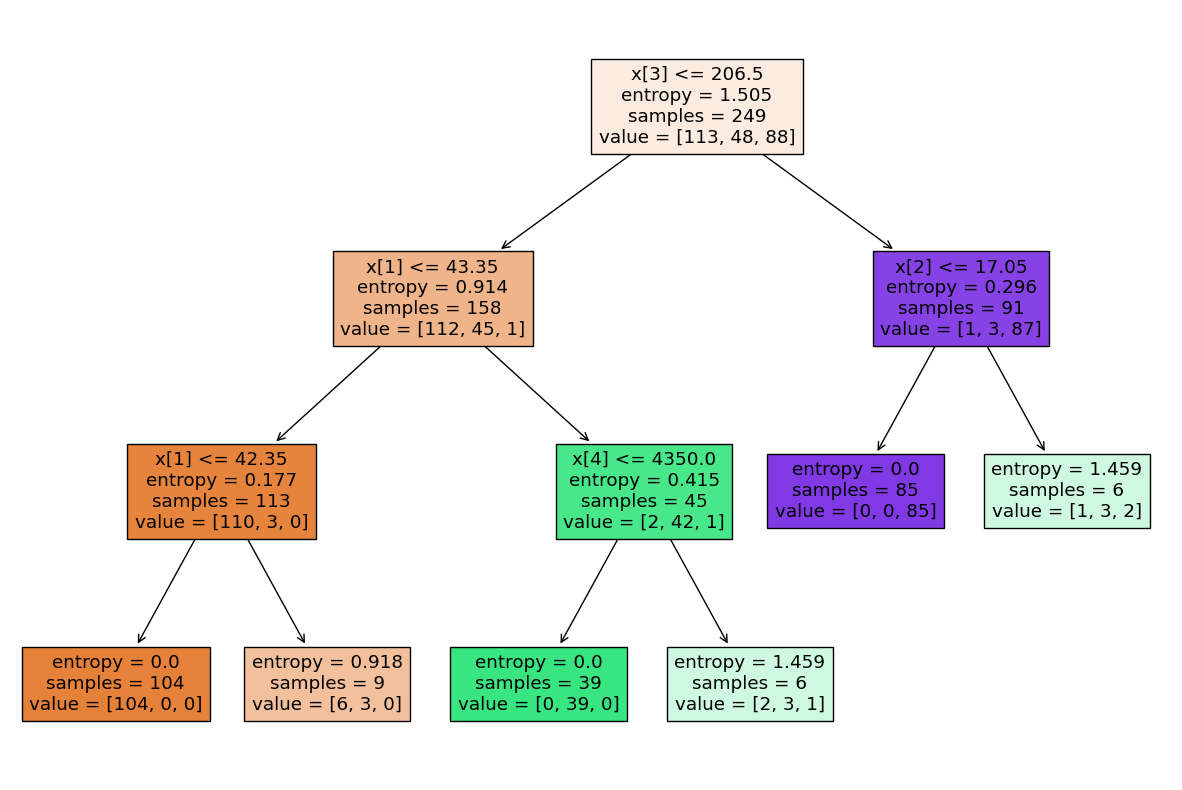

The training accuracy is: 0.963855421686747
The testing accuracy is: 0.9285714285714286
The current max_depth is 6 The current least node size is 9


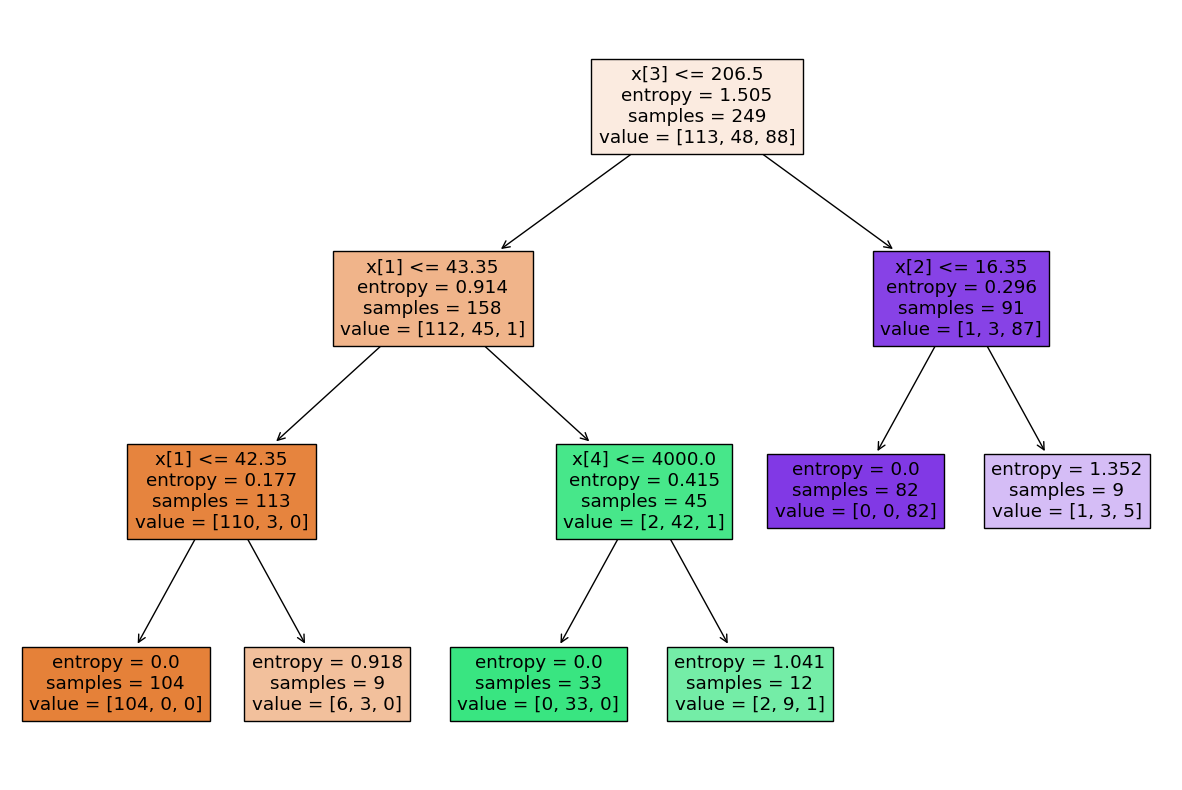

The training accuracy is: 0.9598393574297188
The testing accuracy is: 0.9166666666666666


In [15]:
# Step 3 Decision tree
def decision_tree(x_tra, x_tes, y_tra, y_tes, maxi_dep, least_node_size):
    clf = tree.DecisionTreeClassifier(max_depth=maxi_dep, min_samples_leaf=least_node_size, criterion='entropy')
    clf = clf.fit(x_tra, y_tra)
    train_accuracy = clf.score(x_tra, y_tra)
    test_accuracy = clf.score(x_tes, y_tes)
    plt.figure(figsize=(15,10))
    plot_tree(clf, filled=True)
    plt.show()
    return [train_accuracy, test_accuracy]
for max_dep in [2, 4, 6]:
    for least_node_sizes in [3, 6, 9]:
        print('The current max_depth is', max_dep, 'The current least node size is', least_node_sizes)
        accuracy = decision_tree(X_train, X_test, y_train, y_test, max_dep, least_node_sizes)
        print('The training accuracy is:', accuracy[0])
        print('The testing accuracy is:', accuracy[1])

In [16]:
# Step 4 Bagging of trees
def bagging_decision_tree(x_tra, x_tes, y_tra, y_tes, maxi_dep, num_of_trees):
    dt = tree.DecisionTreeClassifier(max_depth=maxi_dep)
    clf_bagg = BaggingClassifier(base_estimator=dt, n_estimators=num_of_trees, random_state=0)
    clf_bagg.fit(x_tra, y_tra)
    train_accuracy = clf_bagg.score(x_tra, y_tra)
    test_accuracy = clf_bagg.score(x_tes, y_tes)
    return [train_accuracy, test_accuracy]
for max_dep in [2, 4, 6]:
    for num in [3, 10, 20]:
        print('The current max_depth is', max_dep, 'The current number of trees is', num)
        accuracy_bagg = bagging_decision_tree(X_train, X_test, y_train, y_test, max_dep, num)
        print('The training accuracy is:', accuracy_bagg[0])
        print('The testing accuracy is:', accuracy_bagg[1])

The current max_depth is 2 The current number of trees is 3
The training accuracy is: 0.9759036144578314
The testing accuracy is: 0.9523809523809523
The current max_depth is 2 The current number of trees is 10
The training accuracy is: 0.9718875502008032
The testing accuracy is: 0.9523809523809523
The current max_depth is 2 The current number of trees is 20
The training accuracy is: 0.9759036144578314
The testing accuracy is: 0.9523809523809523
The current max_depth is 4 The current number of trees is 3
The training accuracy is: 0.9839357429718876
The testing accuracy is: 0.9761904761904762
The current max_depth is 4 The current number of trees is 10
The training accuracy is: 0.9919678714859438
The testing accuracy is: 0.9761904761904762
The current max_depth is 4 The current number of trees is 20
The training accuracy is: 0.9959839357429718
The testing accuracy is: 0.9761904761904762
The current max_depth is 6 The current number of trees is 3
The training accuracy is: 0.98393574297188

In [17]:
# Step 5 Random Forest
def random_forest(x_tra, x_tes, y_tra, y_tes, num_of_trees, value_of_m):
    clf_random_forest = RandomForestClassifier(random_state=0, n_estimators=num_of_trees,
                                               min_samples_split=value_of_m, max_depth=8)
    clf_random_forest.fit(x_tra, y_tra)
    train_accuracy = clf_random_forest.score(x_tra, y_tra)
    test_accuracy = clf_random_forest.score(x_tes, y_tes)
    return [train_accuracy, test_accuracy]
for m in [2, 4, 6]:
    for num in [3, 10, 20]:
        print('The current number of trees is', num, 'The current value of m is', m)
        accuracy_random_forest = random_forest(X_train, X_test, y_train, y_test, num, m)
        print('The training accuracy is:', accuracy_random_forest[0])
        print('The testing accuracy is:', accuracy_random_forest[1])

The current number of trees is 3 The current value of m is 2
The training accuracy is: 0.9799196787148594
The testing accuracy is: 0.9523809523809523
The current number of trees is 10 The current value of m is 2
The training accuracy is: 0.9919678714859438
The testing accuracy is: 0.9761904761904762
The current number of trees is 20 The current value of m is 2
The training accuracy is: 0.9959839357429718
The testing accuracy is: 0.9880952380952381
The current number of trees is 3 The current value of m is 4
The training accuracy is: 0.9799196787148594
The testing accuracy is: 0.9523809523809523
The current number of trees is 10 The current value of m is 4
The training accuracy is: 0.9919678714859438
The testing accuracy is: 0.9761904761904762
The current number of trees is 20 The current value of m is 4
The training accuracy is: 0.9919678714859438
The testing accuracy is: 0.9642857142857143
The current number of trees is 3 The current value of m is 6
The training accuracy is: 0.9759036

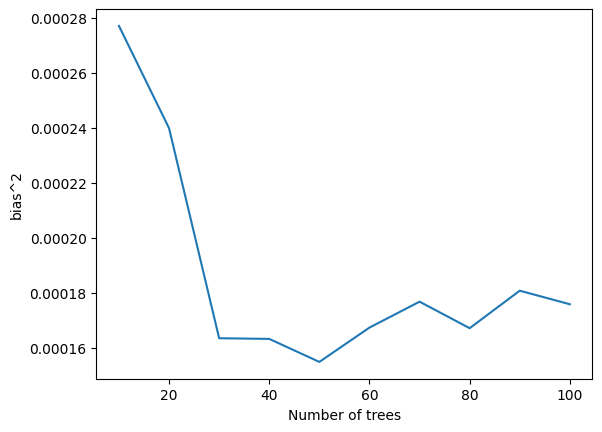

In [18]:
# Step 6 Plot the bias^2
bias_square = []
num_of_trees = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for num in num_of_trees:
    clf_r_f = RandomForestClassifier(random_state=0, n_estimators=num, max_depth=8)
    X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf_r_f, X_train, y_train, X_test, y_test, loss='mse')
    bias_square.append(np.square(avg_bias))
plt.xlabel('Number of trees')
plt.ylabel('bias^2')
plt.plot(num_of_trees, bias_square)
plt.show()